In [ ]:
# opten OAS website from the following link and choose unpaired sequences
# https://opig.stats.ox.ac.uk/webapps/oas/

In [ ]:
# apply the following filter

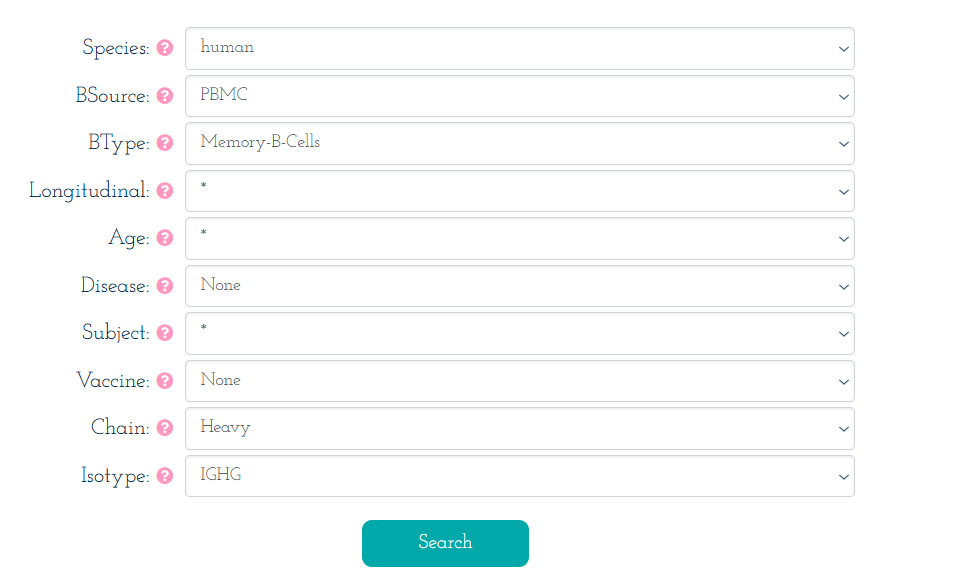

In [ ]:
 # this yields 444,594 unique sequences from 8 studies.

In [ ]:
import os
import re
import time
import requests
from pathlib import Path
from pathlib import Path
import glob
import pandas as pd
import numpy as np


OUT_DIR = Path("OAS_downloads")
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [ ]:
def download(url, out_dir=OUT_DIR, retries=3, timeout=120):
    fname = out_dir / os.path.basename(url)
    for attempt in range(1, retries+1):
        try:
            with requests.get(url, stream=True, timeout=timeout) as r:
                r.raise_for_status()
                with open(fname, "wb") as f:
                    for chunk in r.iter_content(chunk_size=1<<20):  # 1 MB
                        if chunk:
                            f.write(chunk)
            if fname.stat().st_size > 0:
                print(f"✓ Downloaded: {fname.name}")
                return fname
            else:
                print(f"Empty file, retrying: {fname.name}")
        except Exception as e:
            print(f"[{attempt}/{retries}] Error downloading {url}: {e}")
            time.sleep(2)
    print(f"✗ FAILED: {url}")
    return None

In [ ]:
URLS = [
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Ellebedy_2016/csv/SRR3620033_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Ellebedy_2016/csv/SRR3620024_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Ellebedy_2016/csv/SRR3620052_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Ellebedy_2016/csv/SRR3620071_Heavy_IGHG.csv.gz",

    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990835_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990833_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990843_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990844_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990853_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990854_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990885_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990886_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990895_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Galson_2015/csv/SRR3990896_Heavy_IGHG.csv.gz",

    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Jaffe_2022/csv/1279066_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Jaffe_2022/csv/1279067_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Jaffe_2022/csv/1279074_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Jaffe_2022/csv/1279075_1_Heavy_IGHG.csv.gz",

    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Johnson_2018/csv/SRR6266468_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Johnson_2018/csv/SRR6266472_Heavy_IGHG.csv.gz",

    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Mroczek_2014/csv/SRR1168792_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Mroczek_2014/csv/SRR1168794_Heavy_IGHG.csv.gz",

    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905679_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905655_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905685_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905661_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905691_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905667_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905697_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905673_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905703_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Rubelt_2016/csv/SRR2905709_Heavy_IGHG.csv.gz",

    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Turchaninova_2016/csv/SRR2558607_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Turchaninova_2016/csv/SRR2558608_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Turchaninova_2016/csv/SRR2558611_Heavy_IGHG.csv.gz",

    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Vander_Heiden_2017/csv/SRR4026008_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Vander_Heiden_2017/csv/SRR4026010_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Vander_Heiden_2017/csv/SRR4026018_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Vander_Heiden_2017/csv/SRR4026011_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Vander_Heiden_2017/csv/SRR4026021_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Vander_Heiden_2017/csv/SRR4026041_1_Heavy_IGHG.csv.gz",
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Vander_Heiden_2017/csv/SRR4026042_1_Heavy_IGHG.csv.gz",
]


In [ ]:
for u in URLS:
    download(u)

✓ Downloaded: SRR3620033_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3620024_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3620052_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3620071_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990835_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990833_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990843_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990844_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990853_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990854_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990885_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990886_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990895_Heavy_IGHG.csv.gz
✓ Downloaded: SRR3990896_Heavy_IGHG.csv.gz
✓ Downloaded: 1279066_1_Heavy_IGHG.csv.gz
✓ Downloaded: 1279067_1_Heavy_IGHG.csv.gz
✓ Downloaded: 1279074_1_Heavy_IGHG.csv.gz
✓ Downloaded: 1279075_1_Heavy_IGHG.csv.gz
✓ Downloaded: SRR6266468_Heavy_IGHG.csv.gz
✓ Downloaded: SRR6266472_Heavy_IGHG.csv.gz
✓ Downloaded: SRR1168792_Heavy_IGHG.csv.gz
✓ Downloaded: SRR1168794_Heavy_IGHG.csv.gz
✓ Downloaded: SRR2905679_Heavy_IGHG.csv.gz
✓ Downloaded: S

In [ ]:
IN_DIR = Path("OAS_downloads")

# Find all the gzipped CSVs the OAS script downloaded
files = sorted(glob.glob(str(IN_DIR / "*.csv.gz")))
print(f"Found {len(files)} files")
print("\nFirst 10 files:")
for f in files[:10]:
    print(" -", Path(f).name)

# Choose ONE to inspect
one_file = Path(files[0]) if files else None
print("\nChosen file:", one_file)

import gzip

with gzip.open(one_file, "rt", encoding="utf-8", errors="ignore") as f:
    # Show the first ~12 lines so you can see the JSON line + the real header
    for i, line in enumerate(f):
        print(f"{i:02d}: {line.rstrip()}")
        if i >= 12:
            break


Found 42 files

First 10 files:
 - 1279066_1_Heavy_IGHG.csv.gz
 - 1279067_1_Heavy_IGHG.csv.gz
 - 1279074_1_Heavy_IGHG.csv.gz
 - 1279075_1_Heavy_IGHG.csv.gz
 - SRR1168792_Heavy_IGHG.csv.gz
 - SRR1168794_Heavy_IGHG.csv.gz
 - SRR2558607_Heavy_IGHG.csv.gz
 - SRR2558608_Heavy_IGHG.csv.gz
 - SRR2558611_Heavy_IGHG.csv.gz
 - SRR2905655_Heavy_IGHG.csv.gz

Chosen file: OAS_downloads/1279066_1_Heavy_IGHG.csv.gz
00: "{""Run"": 1279066, ""Link"": ""https://doi.org/10.1038/s41586-022-05371-z"", ""Author"": ""Jaffe et al., 2022"", ""Species"": ""human"", ""Age"": 38, ""BSource"": ""PBMC"", ""BType"": ""Memory-B-Cells"", ""Vaccine"": ""None"", ""Disease"": ""None"", ""Subject"": ""Donor-3"", ""Longitudinal"": ""no"", ""Unique sequences"": 1290, ""Total sequences"": 1309, ""Isotype"": ""IGHG"", ""Chain"": ""Heavy""}"
01: sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,d_call,j_call,sequence_alignment,germline_alignment,sequence_alignment_aa,germline_alignment_

In [ ]:
import pandas as pd

# Read the CSV, skipping the 1st line (the JSON metadata)
df1 = pd.read_csv(one_file, compression="infer", skiprows=1)
df1.columns = [c.strip() for c in df1.columns]

print(f"Rows: {len(df1)}\n\nColumns ({len(df1.columns)}):")
for i, c in enumerate(df1.columns, 1):
    print(f"{i:>2}. {c}")

print("\nHead:")
display(df1.head(3))

Rows: 1290

Columns (97):
 1. sequence
 2. locus
 3. stop_codon
 4. vj_in_frame
 5. v_frameshift
 6. productive
 7. rev_comp
 8. complete_vdj
 9. v_call
10. d_call
11. j_call
12. sequence_alignment
13. germline_alignment
14. sequence_alignment_aa
15. germline_alignment_aa
16. v_alignment_start
17. v_alignment_end
18. d_alignment_start
19. d_alignment_end
20. j_alignment_start
21. j_alignment_end
22. v_sequence_alignment
23. v_sequence_alignment_aa
24. v_germline_alignment
25. v_germline_alignment_aa
26. d_sequence_alignment
27. d_sequence_alignment_aa
28. d_germline_alignment
29. d_germline_alignment_aa
30. j_sequence_alignment
31. j_sequence_alignment_aa
32. j_germline_alignment
33. j_germline_alignment_aa
34. fwr1
35. fwr1_aa
36. cdr1
37. cdr1_aa
38. fwr2
39. fwr2_aa
40. cdr2
41. cdr2_aa
42. fwr3
43. fwr3_aa
44. fwr4
45. fwr4_aa
46. cdr3
47. cdr3_aa
48. junction
49. junction_length
50. junction_aa
51. junction_aa_length
52. v_score
53. d_score
54. j_score
55. v_cigar
56. d_cigar
57. 

,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,d_call,...,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,c_region,ANARCI_numbering,ANARCI_status,Redundancy
0,GAGCTCTGGGAGAGGAGCCCCAGCCCTGAGATTCCCAGGTGCTTCC...,H,F,T,F,T,F,F,IGHV3-9*01,IGHD7-27*01,...,427.0,474.0,TTGACTCCGAGGG,13,CCAGCCCCTTCATC,14.0,GGCCTCCACCAAGGGCCCATCGGTCTTCCCCCTGGCACCCTCCTCC...,"{'fwh1': {'1 ': 'E', '2 ': 'V', '3 ': 'K', '4 ...","|Deletions: 10, 73||||",1
1,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,H,F,T,F,T,F,T,IGHV3-23*01,IGHD4-17*01,...,425.0,469.0,GGAGGAATTCGAT,13,TCGACAGCT,9.0,CCTCCACCAAGGGCCCATCGGTCTTCCCCCTGGCGCCCTGCTCCAG...,"{'fwh1': {'1 ': 'E', '2 ': 'V', '3 ': 'Q', '4 ...","|Deletions: 10, 73||||",1
2,ACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACATCT...,H,F,T,F,T,F,T,IGHV4-61*02,IGHD5-18*01,...,384.0,431.0,TGGAG,5,CCACGGCA,8.0,CCTCCACCAAGGGCCCATCGGTCTTCCCCCTGGCACCCTCCTCCAA...,"{'fwh1': {'1 ': 'Q', '2 ': 'V', '3 ': 'Q', '4 ...","|Deletions: 10, 73||||",1


In [ ]:
# Define a helper function to load one file
def load_one(path):
    """
    Load a single OAS .csv.gz file.
    Skips the 1st JSON metadata line, reads real CSV header from 2nd line.
    """
    df = pd.read_csv(path, compression="infer", skiprows=1)
    # Strip spaces from column names just in case
    df.columns = [c.strip() for c in df.columns]
    return df

# Load all files and combine
dfs = []

for path in files:
    print(f"Loading {path} ...")
    try:
        df = load_one(path)
        dfs.append(df)
    except Exception as e:
        print(f"⚠️ Skipped {path}: {e}")

# Combine them into one dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Inspect
print(f"\n Combined dataframe shape: {combined_df.shape}")
print("\nColumns:")
print(list(combined_df.columns))

# Show a small preview
display(combined_df.head(3))


Loading OAS_downloads/1279066_1_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/1279067_1_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/1279074_1_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/1279075_1_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR1168792_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR1168794_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2558607_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2558608_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2558611_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905655_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905661_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905667_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905673_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905679_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905685_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905691_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905697_Heavy_IGHG.csv.gz ...
Loading OAS_downloads/SRR2905703_Heavy_IGHG.csv.gz ...
Loading OAS_do

,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,d_call,...,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,c_region,ANARCI_numbering,ANARCI_status,Redundancy
0,GAGCTCTGGGAGAGGAGCCCCAGCCCTGAGATTCCCAGGTGCTTCC...,H,F,T,F,T,F,F,IGHV3-9*01,IGHD7-27*01,...,427.0,474.0,TTGACTCCGAGGG,13.0,CCAGCCCCTTCATC,14.0,GGCCTCCACCAAGGGCCCATCGGTCTTCCCCCTGGCACCCTCCTCC...,"{'fwh1': {'1 ': 'E', '2 ': 'V', '3 ': 'K', '4 ...","|Deletions: 10, 73||||",1
1,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,H,F,T,F,T,F,T,IGHV3-23*01,IGHD4-17*01,...,425.0,469.0,GGAGGAATTCGAT,13.0,TCGACAGCT,9.0,CCTCCACCAAGGGCCCATCGGTCTTCCCCCTGGCGCCCTGCTCCAG...,"{'fwh1': {'1 ': 'E', '2 ': 'V', '3 ': 'Q', '4 ...","|Deletions: 10, 73||||",1
2,ACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACATCT...,H,F,T,F,T,F,T,IGHV4-61*02,IGHD5-18*01,...,384.0,431.0,TGGAG,5.0,CCACGGCA,8.0,CCTCCACCAAGGGCCCATCGGTCTTCCCCCTGGCACCCTCCTCCAA...,"{'fwh1': {'1 ': 'Q', '2 ': 'V', '3 ': 'Q', '4 ...","|Deletions: 10, 73||||",1


In [ ]:
combined_df["locus"].unique()

array(['H'], dtype=object)

In [ ]:
combined_df["productive"].unique()

array(['T'], dtype=object)

In [ ]:
# Define the sequence column
seq_col = "sequence_alignment_aa"

# Basic sequence hygiene
print(f"Initial total rows: {len(combined_df):,}")
df = combined_df.copy()

df = df.dropna(subset=[seq_col])
print(f"After dropna (non-missing sequences): {len(df):,}")

df[seq_col] = df[seq_col].astype(str).str.strip().str.upper()

# Keep only canonical amino acid sequences
aa_re = re.compile(r"^[ACDEFGHIKLMNPQRSTVWY]+$")
df = df[df[seq_col].str.fullmatch(aa_re)]
print(f"After filtering to canonical amino acids: {len(df):,}")

# Keep only heavy-chain variable regions of 90–150 residues reanable length)
df["vh_len"] = df[seq_col].str.len()
df = df[df["vh_len"].between(90, 150)]
print(f"After VH length filter (90–150 aa): {len(df):,}")

print("\n✅ Final cleaned DataFrame shape:", df.shape)

Initial total rows: 444,594
After dropna (non-missing sequences): 444,594
After filtering to canonical amino acids: 444,106
After VH length filter (90–150 aa): 425,736

✅ Final cleaned DataFrame shape: (425736, 98)


In [ ]:
df_qc = df.copy()

seq_col = "sequence_alignment_aa"

before = len(df_qc)
df_qc = df_qc.drop_duplicates(subset=[seq_col])
after = len(df_qc)

print(f"Rows before deduplication: {before:,}")
print(f"Rows after deduplication:  {after:,}")
print(f"Exact duplicate VH sequences removed: {before - after:,}")

Rows before deduplication: 425,736
Rows after deduplication:  422,672
Exact duplicate VH sequences removed: 3,064


In [ ]:
# extracting the gene families

oas_df = df_qc.copy()

def get_v_family_from_v_call(v_call):
    if pd.isna(v_call):
        return None

    s = str(v_call)
    # Take the first call if multiple are present
    s = s.split(",")[0].split("|")[0].strip()

    m = re.search(r"(IGHV\d+)", s)
    return m.group(1) if m else None

oas_df["v_family"] = oas_df["v_call"].apply(get_v_family_from_v_call)

# Keep only rows where we could assign a family
oas_df = oas_df.dropna(subset=["v_family"]).reset_index(drop=True)


In [ ]:
oas_df["v_family"].value_counts()


,count
v_family,
IGHV3,218179
IGHV4,89469
IGHV1,68581
IGHV5,22500
IGHV2,14732
IGHV6,5858
IGHV7,3353


In [ ]:
#Compute percentage distribution
oas_df["v_family"].value_counts(normalize=True) * 100

,proportion
v_family,
IGHV3,51.618986
IGHV4,21.167477
IGHV1,16.225584
IGHV5,5.323277
IGHV2,3.485445
IGHV6,1.385945
IGHV7,0.793287


In [ ]:
# Create a list for families distribution of the positive set (obtained from notebook 01_therasabdab_preprocessing.ipynb)

pos_family_frac = pd.Series({
    "IGHV3": 45.60,
    "IGHV1": 31.87,
    "IGHV4": 10.99,
    "IGHV5": 4.40,
    "IGHV2": 3.85,
    "IGHV7": 1.65,
    "IGHV6": 1.10,
    "IGHV8": 0.55,
}, name="proportion") / 100.0

pos_family_frac


,proportion
IGHV3,0.4560
IGHV1,0.3187
IGHV4,0.1099
IGHV5,0.0440
IGHV2,0.0385
IGHV7,0.0165
IGHV6,0.0110
IGHV8,0.0055


In [ ]:
# Check common families between the two sets
common_fams = sorted(set(pos_family_frac.index) & set(oas_df["v_family"].unique()))
print("Common families between positives and OAS:", common_fams)

# Restrict the positive distribution to the families that actually exist in OAS
pos_family_frac_common = pos_family_frac[common_fams]

# Renormalize to sum to 1 over these families
pos_family_frac_common = pos_family_frac_common / pos_family_frac_common.sum()
pos_family_frac_common

Common families between positives and OAS: ['IGHV1', 'IGHV2', 'IGHV3', 'IGHV4', 'IGHV5', 'IGHV6', 'IGHV7']


,proportion
IGHV1,0.320430
IGHV2,0.038709
IGHV3,0.458476
IGHV4,0.110497
IGHV5,0.044239
IGHV6,0.011060
IGHV7,0.016590


In [ ]:
# Downsampling oas to 2000 sample

TARGET_N = 2000

downsampled_chunks = []
allocated = 0

for fam in common_fams:
    frac = pos_family_frac_common[fam]
    n_target = int(round(frac * TARGET_N))

    fam_subset = oas_df[oas_df["v_family"] == fam]

    if len(fam_subset) == 0 or n_target == 0:
        continue

    n_sample = min(n_target, len(fam_subset))

    sampled = fam_subset.sample(n=n_sample, random_state=42)
    downsampled_chunks.append(sampled)
    allocated += n_sample

oas_2000 = pd.concat(downsampled_chunks)
print("Allocated after family-wise sampling:", len(oas_2000))


Allocated after family-wise sampling: 1999


In [ ]:
print("Positive set family %:")
print((pos_family_frac_common * 100).round(2))

print("\nOAS 2000 subset family %:")
print((oas_2000["v_family"].value_counts(normalize=True) * 100).round(2))

Positive set family %:
IGHV1    32.04
IGHV2     3.87
IGHV3    45.85
IGHV4    11.05
IGHV5     4.42
IGHV6     1.11
IGHV7     1.66
Name: proportion, dtype: float64

OAS 2000 subset family %:
v_family
IGHV3    45.87
IGHV1    32.07
IGHV4    11.06
IGHV5     4.40
IGHV2     3.85
IGHV7     1.65
IGHV6     1.10
Name: proportion, dtype: float64


In [ ]:
# Add label = 0 for unlabeled
df_unl2 = oas_2000.copy()
df_unl2["label"] = 0

# Add a unique ID
df_unl2["seq_id"] = [f"OAS_{i}" for i in range(len(df_unl2))]

# Save
unl_for_model = df_unl2[[ "seq_id", "sequence_alignment_aa", "label", "cdr3_aa", "v_family"]].copy()

unl_for_model.to_csv("df_unl.csv", index=False)